[中文版](http://nbviewer.jupyter.org/github/w407022008/All-of-Notes/blob/master/System_Science_and_Control_Engineering/线性系统状态方程的解%20Solution%20of%20linear%20state%20space%20equation.ipynb)

# Solution of linear system equation
- Solution of State Equation of Linear Time-Invariant Continuous System
- Solution of State Equation of Linear Time-Variant Continuous System
- Discretization of state space model for linear continuous systems
- Solution of State Equation of Linear Discrete System
    - Linear Time-Invariant System
    - Linear Time-Variant System

## Solution of State Equation of Linear Time-Invariant Continuous System

Defining the state of a movement from the state of $t_0$ to the time of $t$ is a transfer process. Then the mathematical form describing such a process is written as: $$X(t)=\phi(t-t_0)X(t_0)$$ $\phi$ is called the state transition matrix.

- For a state differential equation：$\dot X=AX+BU$，there is a Laplace transform：$X(s)=(sI-A)^{-1}X_0+(sI-A)^{-1}BU(s)$，Then there is a ** state response** (Laplace inverse transform)：$$X(t)=L^{-1}((sI-A)^{-1}X_0)+L^{-1}((sI-A)^{-1}BU(s))$$
$$=e^{A(t-t_0)}X_0+\lmoustache _{t_0}^t e^{A(t-\tau)}BU(\tau)d\tau$$
$$=\phi(t-t_0)X(t_0)+\lmoustache_{t_0}^t\phi(t-\tau)BU(\tau)d\tau$$

- For a state space model：$\begin{cases} \dot X=AX+BU \\ Y=CX+DU \end{cases}$，there is a ** output response**：
$$Y(t)=C\phi(t-t_0)X(t_0)+\lmoustache_{t_0}^tC\phi(t-\tau)BU(\tau)d\tau+DU(t)$$
the product term$C\phi(t-t_0)X(t_0)$ is called as **zero input response**，the convolution term$\lmoustache_{t_0}^tC\phi(t-\tau)BU(\tau)d\tau$ is called as **zero state response**，the remaining item $DU(t)$ is called as **Input and Output Feed Forward**。
> $\phi(t-t_0)=e^{A(t-t_0)}X_0=I+A(t-t_0)+\frac{A^2}{2!}(t-t_0)^2+\cdots$
if，$U(\tau)=\delta(\tau)$(unit pulse function)，and $X(t_0)=0$，then $Y(t)=h(t)$(unit impulse response)，$h(t)=L^{-1}(C(sI-A)^{-1}B+D)$

## - Calculation of matrix exponential function in Matlab

- Numeral Calculations：$e^{At}=expm(A*t)$
``` matlab
expm(A*t)
```
- Symbolic calculation:
``` matlab
syms x t
f1='sin(x)^2+cos(x)^3-3';
A=sym('[f1 0; 0 0]');
expm(A*t)
```

In [4]:
syms x t
f1='sin(x)^2+cos(x)^3-3'
A = sym('A',[2 2])
det(A*t)
expm(A*t);


f1 =

    'sin(x)^2+cos(x)^3-3'

 
A =
 
[ A1_1, A1_2]
[ A2_1, A2_2]
 
 
ans =
 
A1_1*A2_2*t^2 - A1_2*A2_1*t^2
 



## Solution of State Equation of Linear Time-Variant Continuous System

For a state differential equation：$\dot X(t)=A(t)X(t)+B(t)U(t)$，it exists **status response**：$$X(t)=\Phi(t,t_0)X(t_0)+\lmoustache_{t_0}^t\Phi(t,\tau)BU(\tau)d\tau$$
the product term $\Phi(t,t_0)X(t_0)$ is called as **zero input response**，the convolution term $\lmoustache_{t_0}^t\Phi(t,\tau)BU(\tau)d\tau$ is called as **zero state response**  
Obviously, the **output response**：$$Y(t)=C(t)X(t)+D(t)U(t)=C(t)\Phi(t,t_0)X(t_0)+C(t)\lmoustache_{t_0}^t\Phi(t,\tau)BU(\tau)d\tau+D(t)U(t)$$
> $\Phi(t,t_0)=e^{\lmoustache_{t_0}^tA(\tau)d\tau}$

Therefore, the linear continuous system state transition equation can be uniformly represented as：$$X(t)=\Phi X(t_0)+\lmoustache_{t_0}^t\Phi BU(\tau)d\tau$$
where，
- Time-invariant system has：$\Phi=\phi(t-t_0)=e^{A(t-t_0)}$
- Time-variant system has：$\Phi=\Phi(t,t_0)=e^{\lmoustache_{t_0}^tA(\tau)d\tau}$

## Discretization of state space model for linear continuous systems

- Time-invariant system has a state equation：$\dot X=AX+BU$，State transition equation：$X(t)=\phi(t-t_0)X(t_0)+\lmoustache_{t_0}^t\phi(t-\tau)BU(\tau)d\tau$
    Can be seen as：$$X((k+1)T)=\phi(T)X(kT)+\lmoustache_{kT}^{(k+1)T}\phi((k+1)T-\tau)BU(\tau)d\tau=\phi(T)X(kT)+\lmoustache_{0}^{T}\phi(\tau)d\tau BU(kT)$$  
    Then there is，$\begin{cases} G(T)=\phi(T)=e^{AT} \\ H(T)=\lmoustache_0^T\phi(t)dtB=\lmoustache_0^Te^{At}dtB \end{cases}$ preserve first-order precision ('zoh'), there is：$\begin{cases} G(T)=I+ AT \\ H(T)=BT \end{cases}$

- Time-variant system has a state equation：$\dot X(t)=A(t)X(t)+B(t)U(t)$，State transition equation：$X(t)=\Phi(t,t_0)X(t_0)+\lmoustache_{t_0}^t\Phi(t,\tau)BU(\tau)d\tau$ Can be seen as：$$X((k+1)T)=\phi((k+1)T,kT)X(kT)+\lmoustache_{kT}^{(k+1)T}\phi((k+1)T,\tau)B(\tau)U(\tau)d\tau=\phi((k+1)T,kT)X(kT)+\lmoustache_{kT}^{(k+1)T}\phi((k+1)T,\tau)Bd\tau U(kT)$$
Then there is，$\begin{cases} G(kT)=\phi((k+1)T,kT) \\ H(T)=\lmoustache_{kT}^{(k+1)T}\Phi((k+1)T,\tau)B(\tau)d\tau \end{cases}$ preserve first-order precision ('zoh'), there is：$\begin{cases} G(T)=e^{\lmoustache_{kT}^{(k+1)T}A(t)dt} \\ H(T)=\lmoustache_{kT}^{(k+1)T}e^{\lmoustache_{kT}^{(k+1)T}A(t)dt}B(\tau)d\tau \end{cases}$

## Continuous system discretization and discrete system continuity in Matlab

``` matlab
sys_dis=c2d(sys,Ts,'method') %①'zoh' :Zero-order hold (default)，②'foh' :modified first-order hold
sys_con=d2c(sys_dis,'method')
```

In [11]:
A=[1 2;3 5];B=[2;2];C=[1 0];
sys=ss(A,B,C,[]);
sys_dis=c2d(sys,1,'zoh');
sys_con=d2c(sys_dis);
G=sys_dis.a
A=sys_con.a


G =

   87.8953  149.7836
  224.6754  387.4625


A =

    1.0000    2.0000
    3.0000    5.0000




## Solution of State Equation of Linear Discrete System

- Zero input response：[y,x,t]=initial(sys,$x_0$,t)
- Step function response：[y,x,t]=step(sys,t)
- Pulse function response：[y,x,t]=impulse(sys,t)
- System response with input：[y,x,t]=lsim(sys,u,t,$x_0$)  
    Where u is the specified input vector. it can also generate input：[u,t]=gensig(type,cycle time,total time,sampling time),type='sin';'square';'puls'

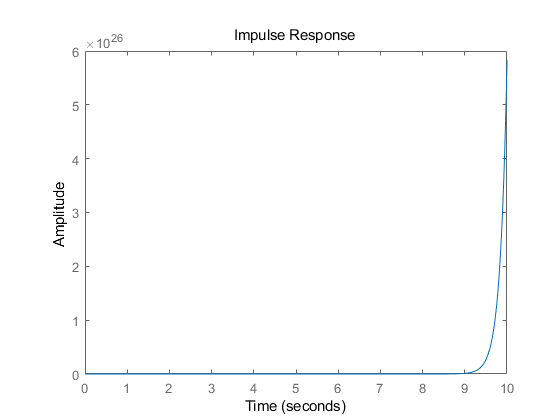

In [14]:
impulse(sys)